# Plotting with catagorical data

[Tutorial](http://seaborn.pydata.org/tutorial.html#tutorial)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

D:\Python\Anaconda3\envs\tensorflow\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
sns.set(style="whitegrid", color_codes=True)

In [4]:
np.random.seed(sum(map(ord, "categorical")))

In [5]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

In [32]:
titanic[:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [15]:
tips[:2]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [16]:
iris[:2]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## 1 - Categorical scatterplots

### [`sns.stripplot()`](http://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot)
```python
sns.stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=False, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)
```

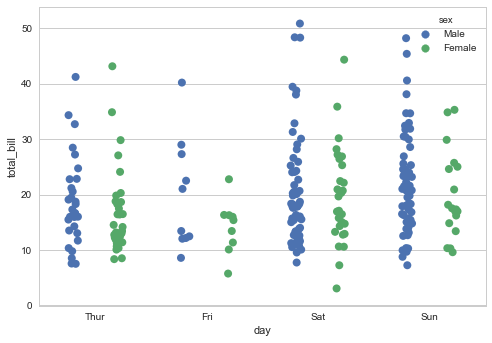

In [46]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue="sex", split=True, size=8);

### [`sns.swarmplot()`](http://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot)
```python
sns.swarmplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)
```


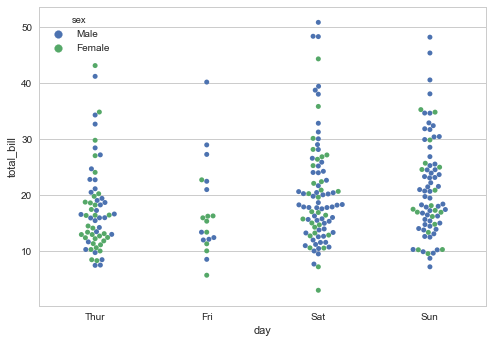

In [25]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

Categories that look numerical will be sorted:

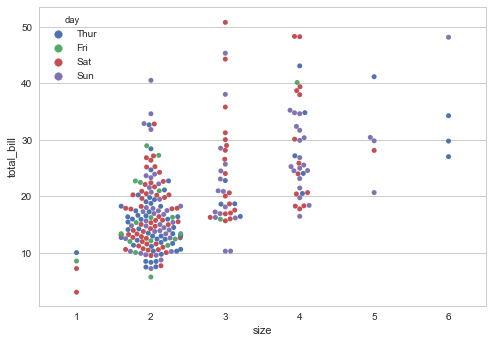

In [26]:
sns.swarmplot(x="size", y="total_bill", data=tips, hue="day");

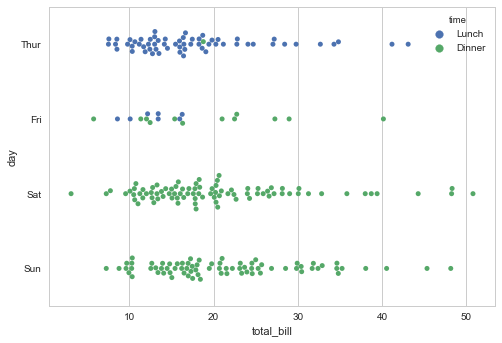

In [31]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

## 2 - Distributions of categories

### [`sns.boxplot()`](http://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)
```python
 sns.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None,
saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
```

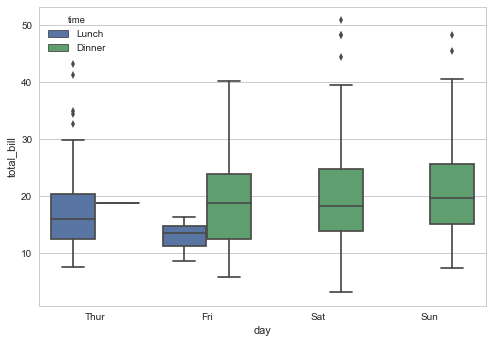

In [6]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

In [9]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])

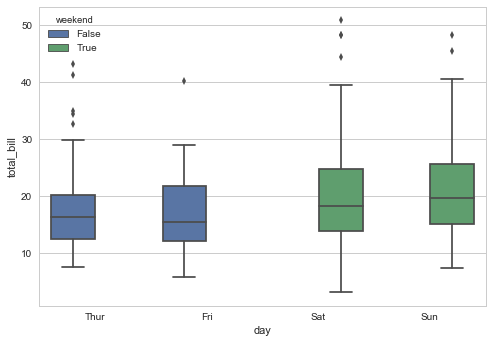

In [16]:
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips);

### [`sns.violinplot()`](http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot)
[violin plot - wikipedia](https://en.wikipedia.org/wiki/Violin_plot)
```python
sns.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
```
- `scale_hue` : `scale=False`整体计算 `scale` , `True` 分类计算

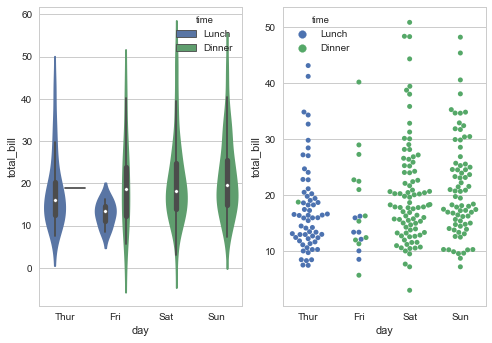

In [20]:
plt.subplot(121)
sns.violinplot(x="day", y="total_bill", hue="time", data=tips);
plt.subplot(122)
sns.swarmplot(x="day", y="total_bill", hue="time", data=tips);

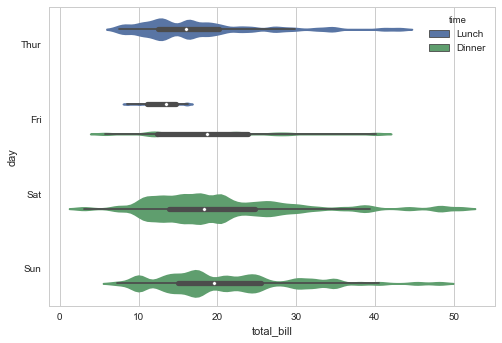

In [26]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
              bw=.1, scale="count", scale_hue=False);

split the violin when the hue has only two levels
- `split = True`

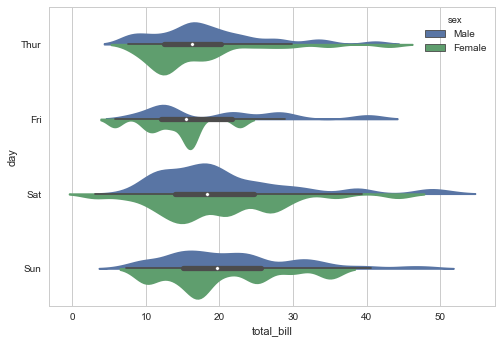

In [41]:
sns.violinplot(x="total_bill", y="day", hue="sex", data=tips,
              bw=.2, scale="area", scale_hue=True, split=True);

`inner = "box" "quartile" "point" "stick" None ` 

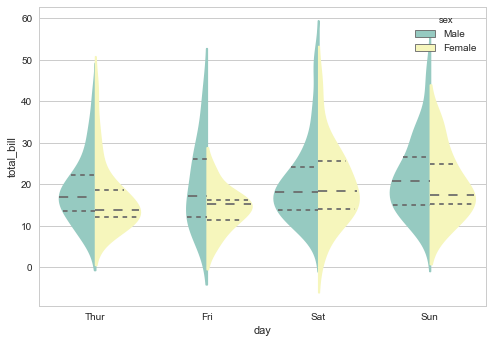

In [48]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
              split=True, inner="quartile" , palette="Set3");

Combine `sns.swarmplot()` with `sns.violinplot()` or `sns.boxplot()`
- `alpha` : 透明度 0~1

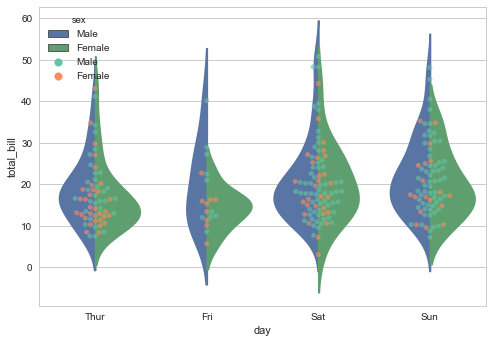

In [62]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None, hue="sex", split=True)
sns.swarmplot(x="day", y="total_bill", data=tips,  alpha=0.6, hue="sex", palette="Set2");

## 3 - Statistical with categories

### [`sns.barplot()`](http://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot)
```python
sns.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
```

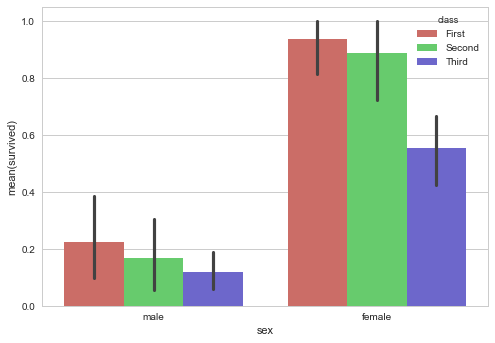

In [74]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic, palette="hls");

### [`sns.countplot()`](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
```python
sns.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, 
              color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
```
- `saturation` : 颜色的饱和度

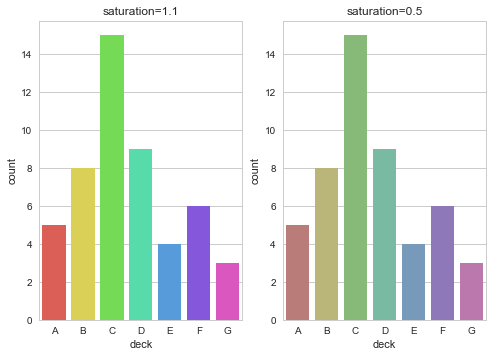

In [91]:
plt.subplot(121)
plt.title("saturation=1.1")
sns.countplot(x="deck", data=titanic, palette="hls", saturation=1.1);

plt.subplot(122)
plt.title("saturation=0.5")
sns.countplot(x="deck", data=titanic, palette="hls", saturation=0.5);

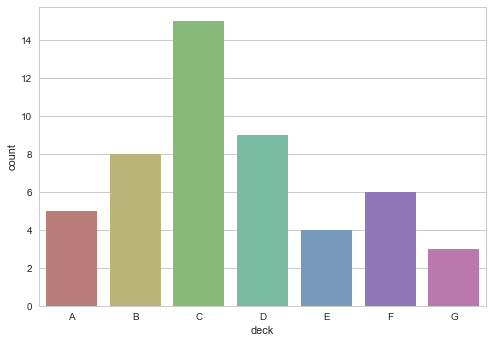

In [84]:
sns.countplot(x="deck", data=titanic, palette="hls", saturation=0.5);

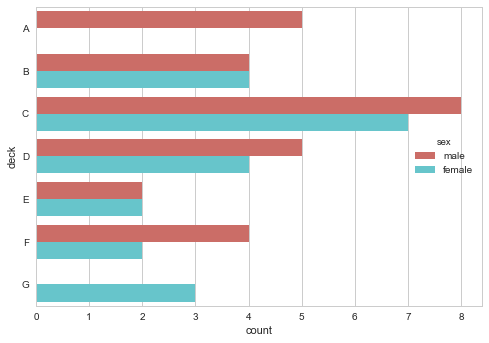

In [99]:
sns.countplot(y="deck", data=titanic, hue="sex", palette="hls");